In [57]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [58]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
df['age_group'] = pd.cut(df['age'], bins=3, labels=('young','middle_age','old') )
df.head(50)

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,young
1,18,male,33.770,1,no,southeast,1725.55230,young
2,28,male,33.000,3,no,southeast,4449.46200,young
3,33,male,22.705,0,no,northwest,21984.47061,young
4,32,male,28.880,0,no,northwest,3866.85520,young
5,31,female,25.740,0,no,southeast,3756.62160,young
6,46,female,33.440,1,no,southeast,8240.58960,middle_age
7,37,female,27.740,3,no,northwest,7281.50560,middle_age
8,37,male,29.830,2,no,northeast,6406.41070,middle_age
9,60,female,25.840,0,no,northwest,28923.13692,old


In [60]:
# What age group has the most smokers. 
# 
df1 = df.groupby(['age_group','smoker'])['sex'].count()
df1.head(6)



age_group   smoker
young       no        412
            yes       111
middle_age  no        311
            yes        91
old         no        341
            yes        72
Name: sex, dtype: int64

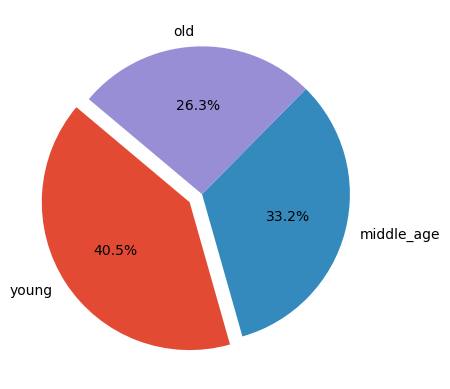

In [68]:
labels = 'young', 'middle_age', 'old', 
sizes = [111, 91, 72]
colors = ["orange", "lightcoral", "lightskyblue"]

fig, ax = plt.subplots()
ax.pie(sizes, startangle=140 , labels=labels, explode=(0.1,0,0), autopct="%1.1f%%")
plt.show()





In [62]:
# average charges for each age group with no children?
df1 = df[(df['children'] == 0)] 
df1

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,young
3,33,male,22.705,0,no,northwest,21984.47061,young
4,32,male,28.880,0,no,northwest,3866.85520,young
5,31,female,25.740,0,no,southeast,3756.62160,young
9,60,female,25.840,0,no,northwest,28923.13692,old
...,...,...,...,...,...,...,...,...
1331,23,female,33.400,0,no,southwest,10795.93733,young
1334,18,female,31.920,0,no,northeast,2205.98080,young
1335,18,female,36.850,0,no,southeast,1629.83350,young
1336,21,female,25.800,0,no,southwest,2007.94500,young


In [63]:
df2 = df1['charges'].mean()
df2


12365.97560163589

In [64]:
children_df = df.groupby(['age_group','children'])['charges'].count()
children_df

age_group   children
young       0           271
            1           109
            2            79
            3            47
            4             9
            5             8
middle_age  0            93
            1           132
            2           103
            3            56
            4            10
            5             8
old         0           210
            1            83
            2            58
            3            54
            4             6
            5             2
Name: charges, dtype: int64

<Axes: title={'center': 'age_group_children'}, xlabel='age_group'>

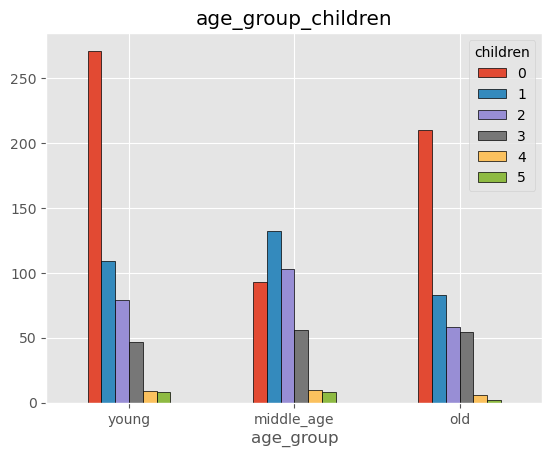

In [69]:
plt.style.use('ggplot')
children_df.unstack().plot(kind='bar', edgecolor='black',rot=0,title='age_group_children')

In [ ]:
# Is there a relationship between BMI and children?
# Based on the region how many male vs females are smokers?
# Is there a correlation between gender region and price of insurance?
# Does age and BMI per region have an effect on price of insurance?


In [ ]:
# Is there a relationship between BMI and children?
